In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import cv2
import glob

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical

In [20]:
from joblib import dump

In [51]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [21]:
feature_vectors = []
labels = []

In [22]:
def get_label(address):
  label = address.split("/")[-2]
  labels.append(label)

In [23]:
#Import Dataset
for i,address in enumerate(glob.glob('/content/drive/MyDrive/DeepLearning/Second/Dataset/fire_dataset/*/**')):
  #Read Image
  img = cv2.imread(address)
  # Check if the image is loaded successfully
  if img is not None:
      # Resize image
      img = cv2.resize(img ,(32,32))
      # Normalize image
      img = img/255.0
      #Flat
      img = img.flatten()
      #append
      feature_vectors.append(img)
      #Give label
      get_label(address)
  else:
      print("Failed to load the image:", address)

  if i % 100 == 0 :
    print(f"Info :{i+1} processed")
print(f"Finished")

Info :1 processed
Info :101 processed
Info :201 processed
Info :301 processed
Info :401 processed
Info :501 processed
Info :601 processed
Info :701 processed
Info :801 processed
Failed to load the image: /content/drive/MyDrive/DeepLearning/Second/Dataset/fire_dataset/non_fire_images/non_fire.189.png
Info :901 processed
Finished


In [24]:
np_feature_vectors = np.array(feature_vectors)


In [25]:
# Assuming 'target' is the name of the target variable column in your dataset
target = labels

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the target variable
label_encoder.fit(target)

# Transform the target variable using label encoding
encoded_labels = label_encoder.transform(target)

In [26]:
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
categ_labels = to_categorical(encoded_labels)

In [28]:
categ_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
#Split
x_train, x_test, y_train, y_test =train_test_split(np_feature_vectors, categ_labels, test_size=0.2,random_state=42)

In [82]:
#Model
model = models.Sequential()
model.add(layers.Dense(300, activation = 'relu',input_dim =3072))
model.add(layers.Dense(40, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))


In [83]:

model.compile(loss='categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])


In [84]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 300)               921900    
                                                                 
 dense_23 (Dense)            (None, 40)                12040     
                                                                 
 dense_24 (Dense)            (None, 2)                 82        
                                                                 
Total params: 934,022
Trainable params: 934,022
Non-trainable params: 0
_________________________________________________________________


In [85]:
result = model.fit(x_train, y_train, validation_data =(x_test, y_test ), epochs= 10 ,batch_size=32)

Epoch 1/10
25/25 [==============================] - 2s 11ms/step - loss: 0.4361 - accuracy: 0.7957 - val_loss: 0.3348 - val_accuracy: 0.8150
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.8922 - val_loss: 0.2072 - val_accuracy: 0.9100
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1832 - accuracy: 0.9248 - val_loss: 0.1735 - val_accuracy: 0.9200
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.1590 - accuracy: 0.9373 - val_loss: 0.1554 - val_accuracy: 0.9300
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9499 - val_loss: 0.1456 - val_accuracy: 0.9450
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1027 - accuracy: 0.9699 - val_loss: 0.1620 - val_accuracy: 0.9300
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1163 - accuracy: 0.9499 - val_loss: 0.1618 - val_accuracy: 0.9200
Epoch 8/10
25/25 [=

<Axes: >

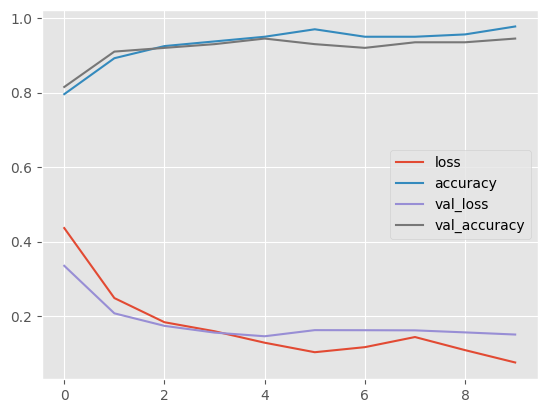

In [86]:

pd.DataFrame(result.history).plot()